In [253]:
%matplotlib inline

In [271]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [272]:
def bandit(act):
    _act2prob = {'a':2,'b':4,'c':9}
    if act in _act2prob.keys():
        if randint(0, _act2prob[act]) % _act2prob[act] == 0:
            return 1
        else:
            return 0
    else:
        return 'err'

def Q_update(r, act, play, Q):
    if play > 0:
        Q[act] = Q[act] + (1/play)*(r - Q[act])
    else:
        return "err"

def Action(Q):
    _act_list = ['a','b','c']
    if randint(0, 9) % 9 == 0:
        return max([(v,k) for k,v in Q.items()])[1]
    else:
        return _act_list[randint(0,2)]

In [273]:
Q = {'a':0,'b':0,'c':0}
Q_list = np.empty([0, 3], float)
PLAY_SIZE = 2000
action = None
rec = None
act_list = ['a','b','c']


In [274]:
for i in range(PLAY_SIZE):
    action = Action(Q)
    rec = bandit(action)
    Q_update(rec, action, i, Q)
    Q_list = np.append(Q_list, np.array([[Q['a'], Q['b'], Q['c']]]), axis=0)
print(Q)

{'b': 0.35222215798473555, 'a': 0.6288702238503365, 'c': 0.10704398861389777}


(0, 0.8)

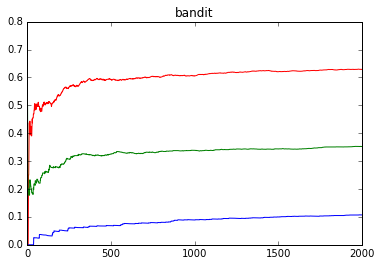

In [280]:
x = np.arange(0, PLAY_SIZE, 1)
y = Q_list
plt.plot(x, y[:, 0], 'r')
plt.plot(x, y[:, 1], 'g')
plt.plot(x, y[:, 2], 'b')
plt.title("bandit")
plt.ylim(0, 0.8)  # yを0-5000の範囲に限定
